<a href="https://colab.research.google.com/github/6058ah/BusinessCapstone/blob/master/2%EC%B0%A8%EC%A0%84%EC%A7%80_etf_%EC%A2%85%EB%AA%A9_%EC%B6%94%EC%B6%9C_%EB%B0%8F_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2차전지 ETF 종목 코드 추출

In [1]:
!pip install pykrx

In [2]:
from pykrx import stock
import requests
import json
from pandas.io.json import json_normalize
import pandas as pd

tickers = stock.get_etf_ticker_list('20210416')
tickers = pd.DataFrame(tickers,columns = ['종목코드'])

url = 'https://finance.naver.com/api/sise/etfItemList.nhn'
json_data = json.loads(requests.get(url).text)
df = json_normalize(json_data['result']['etfItemList'])
df=df[['itemcode','itemname']]
df=df.rename(columns={'itemcode':'종목코드','itemname':'종목명'})

etf = pd.merge(left = tickers, right = df, how = 'left', on= '종목코드')
battery_etf = etf[etf['종목명'].str.contains('2차전지')]
battery_etf = battery_etf.drop(index=124)
battery_etf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if sys.path[0] == '':


,종목코드,종목명
118,305540,TIGER 2차전지테마
247,305720,KODEX 2차전지산업


##국내 산업 2차전지 관련 ETF는 'TIGER 2차전지테마', 'KODEX 2차전지산업', 'TIGER KRX2차전지K-뉴딜' 총 3가지


#2차전지 ETF 주가차트

## TIGER KRX2차전지K-뉴딜은 상장된지 오래되지 않아서 제외



In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [5]:
import matplotlib.font_manager as fm
fm._rebuild()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


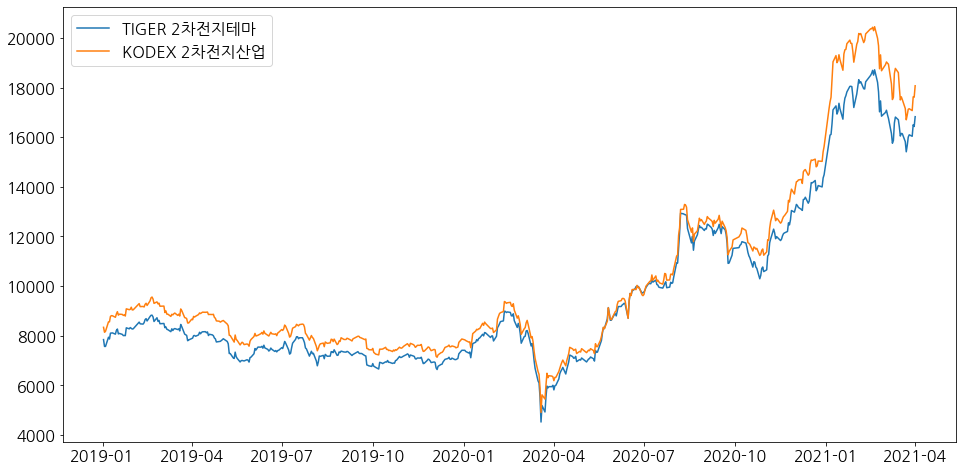

In [6]:
stocks = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  price = stock.get_etf_ohlcv_by_date("20190101","202104016",b)
  stocks[a]=price['종가'].values[:].tolist()
prices = pd.DataFrame(stocks)
prices.index = price.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(prices)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt.show()

#괴리율 확인
## 실제 ETF가 보유한 순자산 가치와 ETF 주가가 얼마나 차이 나는 지 보는 지표
## pykrx에서 ETF 괴리율 정보 제공

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'up per left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


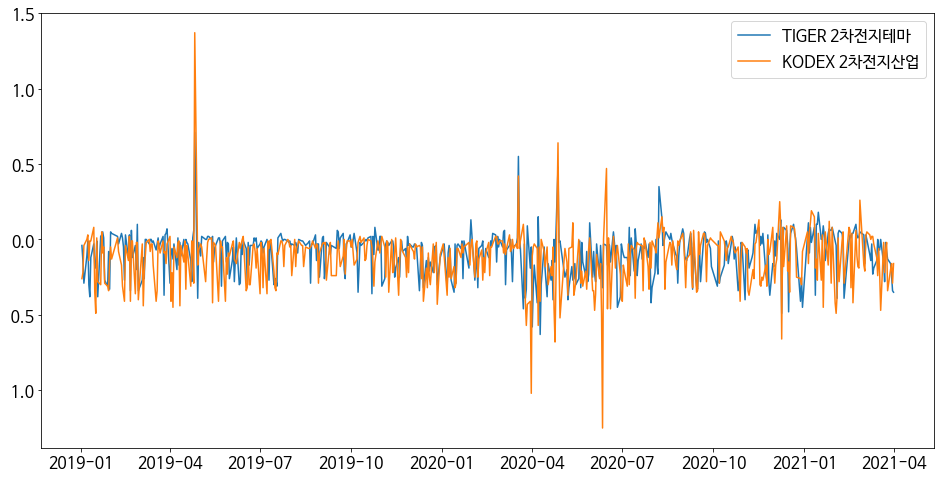

In [7]:
deviation = dict()
for a, b in battery_etf[['종목명','종목코드']].itertuples(index=False):
  dev = stock.get_etf_price_deviation("20190101","202104016",b)
  deviation[a]=dev['괴리율'].values[:].tolist()
deviations = pd.DataFrame(deviation)
deviations.index = dev.index

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.plot(deviations)
plt.legend(['TIGER 2차전지테마','KODEX 2차전지산업'], loc = 'up per left')

plt

#2차전지 테마 구성종목 수

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

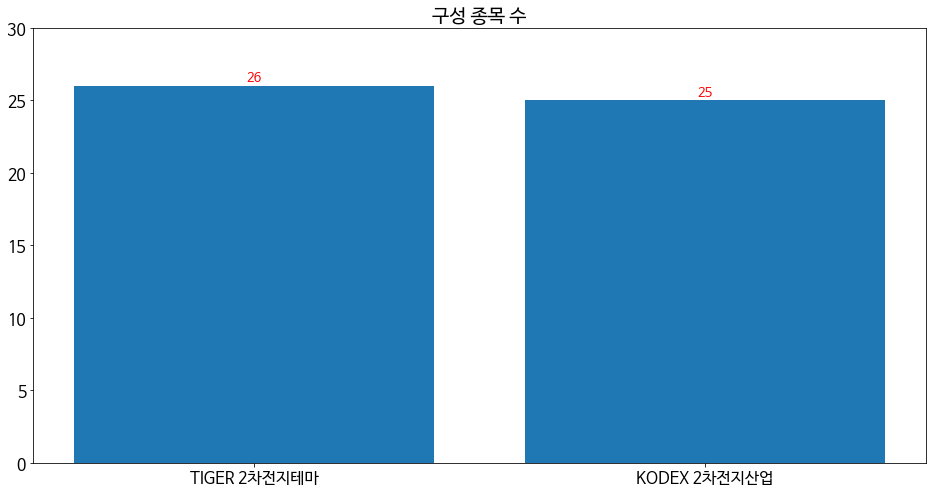

In [8]:
tiger = stock.get_etf_portfolio_deposit_file('305540','20210416')
kodex = stock.get_etf_portfolio_deposit_file('305720','20210416')

len_tiger = len(tiger)
len_kodex = len(kodex)

port = pd.DataFrame([len_tiger, len_kodex], index = ['TIGER 2차전지테마','KODEX 2차전지산업'])
port.columns = ['구성 종목 수']

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.bar(port.index, port['구성 종목 수'])

for x,y in enumerate(list(port['구성 종목 수'])):
  plt.text(x,y,y, fontsize = 13, color = '#ff0000', horizontalalignment='center', verticalalignment = 'bottom')

plt.ylim(0,30)
plt.title('구성 종목 수')
plt

# ETF 총 보유자산 비교

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

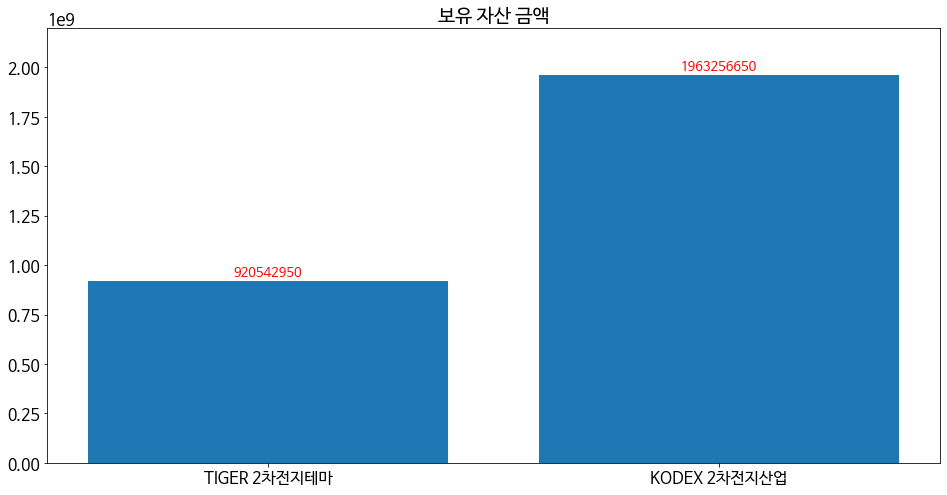

In [9]:
ti_asset = tiger['금액'].sum()
kd_asset = kodex['금액'].sum()

assets = pd.DataFrame([ti_asset, kd_asset], index = ['TIGER 2차전지테마','KODEX 2차전지산업'])
assets.columns = ['보유 자산 금액']

plt.rc('font', family='NanumBarunGothic', size =16) 
plt.figure(figsize=(16,8))

plt.bar(assets.index, assets['보유 자산 금액'])

for x,y in enumerate(list(assets['보유 자산 금액'])):
  plt.text(x,y,y, fontsize = 13, color = '#ff0001', horizontalalignment='center', verticalalignment = 'bottom')

plt.ylim(0, 2200000000)
plt.title('보유 자산 금액')
plt

##ETF 구성 종목 비중 TOP10

In [10]:
df1=pd.merge(left=tiger['비중'],right=kodex['비중'], how = 'outer', left_on=tiger.index, right_on=kodex.index)
df1= df1.set_index('key_0')
df1.columns = ['TIGER 2차전지테마','KODEX 2차전지산업']
df1=df1.fillna(0)
df2=df1[:10]
df2

,TIGER 2차전지테마,KODEX 2차전지산업
key_0,,
096770,10.93,16.090000
011790,10.23,0.000000
051910,10.17,16.250000
006400,9.74,13.730000
003670,9.60,17.780001
247540,6.44,3.610000
020150,6.42,3.710000
066970,6.28,3.910000
357780,5.25,0.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


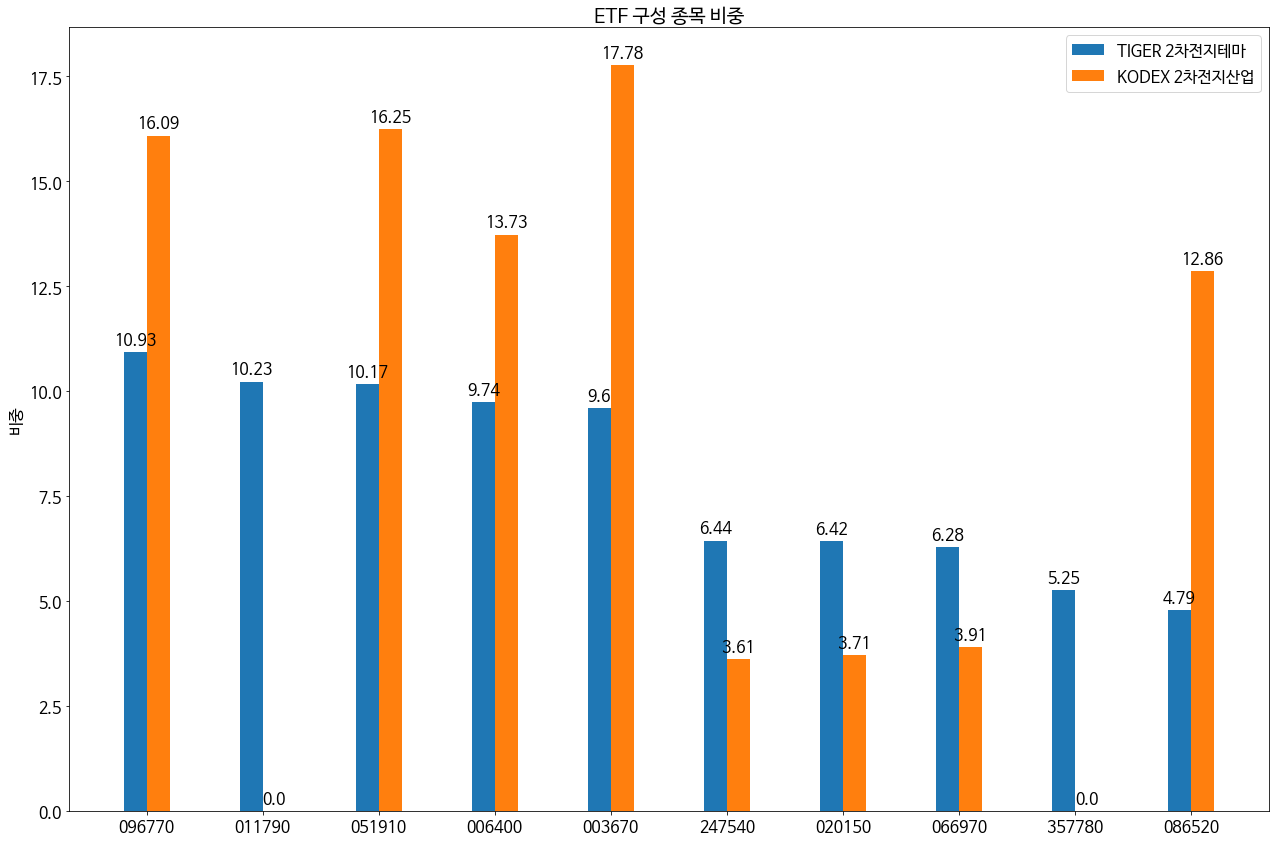

In [18]:
df2['TIGER 2차전지테마'] = df2['TIGER 2차전지테마'].apply(lambda x: float('{:.2f}'.format(x)))
df2['KODEX 2차전지산업'] = df2['KODEX 2차전지산업'].apply(lambda x: float('{:.2f}'.format(x)))

import numpy as np


plt.rc('font', family='NanumBarunGothic', size =16) 

fig, ax = plt.subplots(figsize = (18,12))
x = np.arange(len(df2.index))
width = 0.20

rects1 = ax.bar(x-(width/2), df2['TIGER 2차전지테마'], width, label = 'TIGER 2차전지테마')
rects2 = ax.bar(x+(width/2), df2['KODEX 2차전지산업'], width, label = 'KODEX 2차전지산업')

ax.set_ylabel('비중')
ax.set_title('ETF 구성 종목 비중')
ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(df2.index)

def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),xy=(rect.get_x()+rect.get_width()/2, height),xytext=(0,3), textcoords = 'offset points', ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()